In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
path = "/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv"

dataset = pd.read_csv(path, index_col=0)

dataset.head()


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [3]:
dataset.shape

(30, 2)

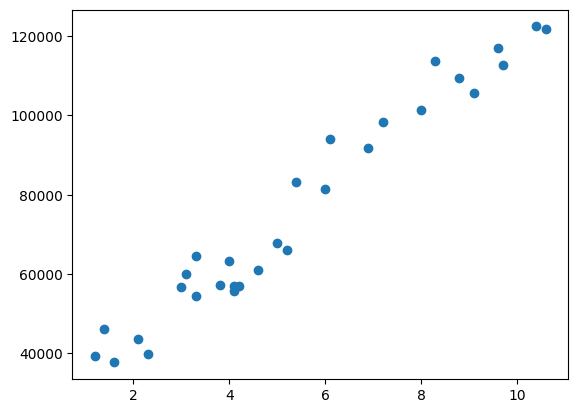

In [4]:
plt.scatter(dataset.YearsExperience, dataset.Salary)

In [5]:
x_train = np.array(dataset['YearsExperience'])
y_train = np.array(dataset['Salary'])
w_init = 0
b_init = 0

In [6]:
def compute_cost(x, y, w, b):
    cost = 0
    m = dataset.shape[0]
    for i in range (m):
        f_wb = w*x[i] + b
        cost = cost + 1./2*m*(f_wb - y[i])**2
    return cost

In [7]:
def compute_gradient(x, y, w, b):
    dj_dw, dj_db = 0, 0
    m = dataset.shape[0]
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw = dj_dw + 1./m*(f_wb - y[i])*x[i]
        dj_db = dj_db + 1./m*(f_wb - y[i])
    return dj_dw, dj_db

In [8]:
def gradient_descent(x, y, w, b, num_iters, cost_func, gradient_func, alpha):
    p_history = [(w, b)]
    for i in range(num_iters):
        dj_dw, dj_db = gradient_func(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if (i%(num_iters//10)==0): p_history.append((w, b))
    return w, b, p_history

In [9]:
w_init, b_init = 0, 0 
iterations = 100
w_final, b_final, p_his = gradient_descent(x_train, y_train, w_init, b_init, iterations, compute_cost, compute_gradient, 1.0e-2)


NameError: name 'y' is not defined

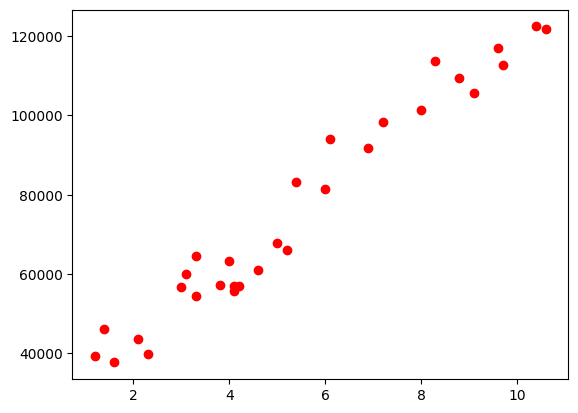

In [10]:
x = np.linspace(0, max(x_train), 100)
plt.scatter(x_train, y_train, label="real data", color="red")
plt.plot(x, y, label="predict line", color="blue")
for i in range(len(p_his)):
    plt.plot(x, p_his[i][0]*x+p_his[i][1])
plt.show()

In [ ]:
accurate = 0.
m = dataset.shape[0]
for i in range(m):
    f_wb = w_final*x[i] + b_final
    accurate = accurate + (1. - abs(f_wb*1. - y[i])/y[i])/m 
print(f"Average accuracy: {accurate}")